# Importing Data in Python (Part 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot

jtplot.style()
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Importing data from the Internet

## 1. Importing flat files from the web

### The urllib package

* Provides interface for fetching data across the web
* `urlopen()` - accepts URLs instead of file names

### How to automate file download in Python

In [2]:
from urllib.request import urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'Importing_Data_in_Python_Part2/winequality-white.csv')

('Importing_Data_in_Python_Part2/winequality-white.csv',
 <http.client.HTTPMessage at 0x1a1e80cac8>)

### Short way

In [3]:
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
red_wine_quality = pd.read_csv(url, sep=';')

### Importing non-flat files from the web

In [4]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xl = pd.read_excel(url, sheetname=None)

# excel sheet names
print(xl.keys()) 

odict_keys(['1700', '1900'])


### №1 Importing flat files from the web: your turn!

* Import the function `urlretrieve` from the subpackage `urllib.request`
* Assign the URL of the file to the variable url
* Use the function `urlretrieve()` to save the file locally as `'winequality-red.csv'`
* Execute the remaining code to load `'winequality-red.csv'` in a pandas DataFrame and to print its head to the shell

In [5]:
from urllib.request import urlretrieve

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
urlretrieve(url, 'Importing_Data_in_Python_Part2/winequality-red.csv')

red_wine_quality = pd.read_csv('Importing_Data_in_Python_Part2/winequality-red.csv', sep=';')
print(red_wine_quality.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### №2 Opening and reading flat files from the web

* Assign the URL of the file to the variable `url`
* Read file into a DataFrame `df` using `pd.read_csv()`, recalling that the separator in the file is `';'`
* Print the head of the DataFrame `df`
* Execute the rest of the code to plot histogram of the first feature in the DataFrame `df`

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

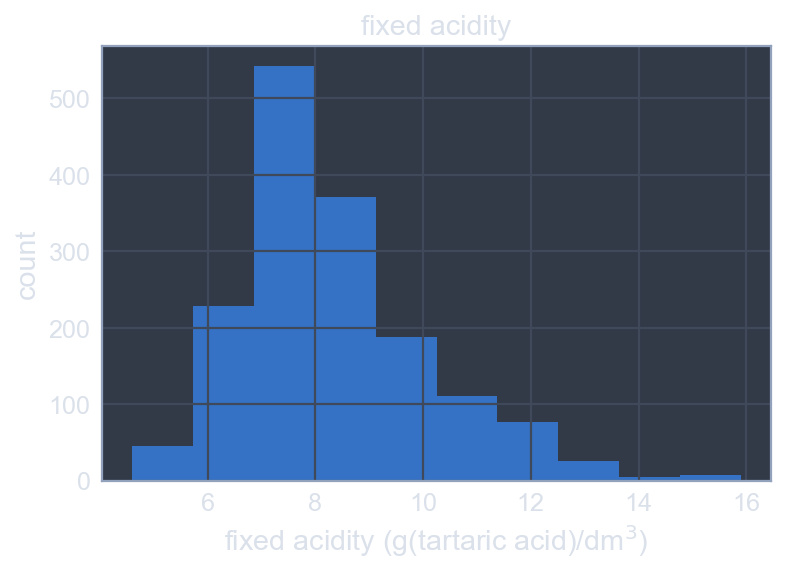

In [6]:
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

red_wine_quality = pd.read_csv(url, sep=';')
print(red_wine_quality.head())

pd.DataFrame.hist(red_wine_quality.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### №3 Importing non-flat files from the web

* Assign the URL of the file to the variable `url`
* Read the file in `url` into a dictionary `xl` using `pd.read_excel()` recalling that, in order to import all sheets you need to pass `None` to the argument `sheetname`
* Print the names of the sheets in the Excel spreadsheet; these will be the keys of the dictionary `xl`
* Print the head of the first sheet using the sheet name, not the index of the sheet! The sheet name is `'1700'`

In [7]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xl = pd.read_excel(url, sheetname=None)

print(xl.keys())

odict_keys(['1700', '1900'])


## 2. HTTP requests to import files from the web

### URL

* Uniform/Universal Resource Locator
* References to web resources
* Focus: web addresses
* Ingredients:
    * Protocol identifier - h!p:
    * Resource name - datacamp.com
* These specify web addresses uniquely

### HTTP

* HyperText Transfer Protocol
* Foundation of data communication for the web
* HTTPS - more secure form of HTTP
* Going to a website = sending HTTP request
  * GET request
* `urlretrieve()` performs a GET request
* __HTML__ - HyperText Markup Language

### GET requests using urllib

In [8]:
from urllib.request import urlopen, Request
    
url = 'https://www.wikipedia.org/'
request = Request(url)
response = urlopen(request)
html = response.read()
    
response.close()

### GET requests using requests

* Used by Majesty's Government, Amazon, Google, Twilio, NPR, Obama for America, 
  Twitter, Sony, and Federal U.S. Institutions that prefer to be unnamed'

### GET requests using requests

In [9]:
import requests
    
url = 'https://www.wikipedia.org/'
r = requests.get(url)
text = r.text

### HTTP requset

In [10]:
from urllib.request import urlopen, Request

url = 'http://www.datacamp.com/teach/documentation'
request = Request(url)
response = urlopen(request)
html = response.read()

response.close()

In [11]:
import requests
    
url = 'http://www.datacamp.com/teach/documentation'
r = requests.get(url)
text = r.text

### №4 Performing HTTP requests in Python using urllib

* Import the functions `urlopen` and `Request` from the subpackage `urllib.request`
* Package the request to the url `'http://www.datacamp.com/teach/documentation'` using the function `Request()` and assign it to `request`
* Send the request and catch the response in the variable `response` with the function `urlopen()`
* Run the rest of the code to see the datatype of `response` and to close the connection!

In [12]:
from urllib.request import urlopen, Request

url = 'http://www.datacamp.com/teach/documentation'
request = Request(url)

response = urlopen(request)
print(type(response))

response.close()

<class 'http.client.HTTPResponse'>


### №5 Printing HTTP request results in Python using urllib

* Send the request and catch the response in the variable `response` with the function `urlopen()`, as in the previous exercise
* Extract the response using the `read()` method and store the result in the variable `html`
* Print the string `html`

In [13]:
from urllib.request import urlopen, Request

url = 'http://www.datacamp.com/teach/documentation'
request = Request(url)
response = urlopen(request)

html = response.read()
print(html)

response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="9TSwP8K1ubW9EVEq+gh6mw1jMway5Pn+sYxYcx2oxuo="></script>\n      <script nonce="9TSwP8K1ubW9EVEq+gh6mw1jMway5Pn+sYxYcx2oxuo=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cen

### №6 Performing HTTP requests in Python using requests

* Import the package `requests`
* Assign the URL of interest to the variable `url`
* Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`
* Use the `text` attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `text`

In [14]:
import requests

url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)

text = r.text
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="BgTp4cowCKWlbwoAn9695T0TLyM8fhcuUNiCFaMn4hI="></script>
      <script nonce="BgTp4cowCKWlbwoAn9695T0TLyM8fhcuUNiCFaMn4hI=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

## 3. Scraping the web in Python

### HTML

* Mix of unstructured and structured data
* Structured data:
    * Has pre-defined data model, or
    * Organized in a defined manner
* Unstructured data: neither of these properties

### BeautifulSoup

* Parse and extract structured data from HTML

  
* Make tag soup beautiful and extract information

### BeautifulSoup

In [15]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

### Prettified Soup

In [16]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <img align="right" src="10.1.jpg" width="250"/>
  <br/>
  <p>
   You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-tur

### Exploring BeautifulSoup

* Many methods such as:

In [17]:
print(soup.get_text())




Beautiful Soup: We called him Tortoise because he taught us.








You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.

Beautiful Soup
"A tremendous boon." -- Python411 Podcast
[ Download | Documentation | Hall of Fame | Source | Changelog | Discussion group  | Zine ]
If you use Beautiful Soup as part of your work, please consider a Tidelift subscription. This will support many of the free software projects your organization depends on, not just Beautiful Soup.
If Beautiful Soup is useful to you on a personal level, you might like to read Tool Safety, a short zine I wrote about what I learned about software development from working on Beautiful Soup. Thanks!

If you have questions, send them to the discussion
group. If you find a bug, file it.
Beautiful Soup is a Python library designed for quick turnaround
projec

In [18]:
print(soup.title)

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


#### Exploring BeautifulSoup

* `find_all()`

In [19]:
for link in soup.find_all('a'):
    print(link.get('href')) 

bs4/download/
#Download
bs4/doc/
#HallOfFame
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.1.tar.gz
None
http://www.nytimes.com/2007/10/25/arts/design/25vide.html
https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py
http://www.harrowell.org.uk/viktormap.html
http://svn.python.org/view/tracker/importer/
http://www2.ljworld.com/
http://www.b-list.org/weblog/2010/nov/02/news-done-broke/
h

### №7 Parsing HTML with BeautifulSoup

* Import the function `BeautifulSoup` from the package `bs4`
* Assign the URL of interest to the variable `url`
* Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`
* Use the `text` attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `html_doc`
* Create a `BeautifulSoup` object `soup` from the resulting HTML using the function `BeautifulSoup()`
* Use the method `prettify()` on `soup` and assign the result to `pretty_soup`

In [20]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text
soup = BeautifulSoup(html_doc)

pretty_soup = soup.prettify()
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a hr

### №8 Turning a webpage into data using BeautifulSoup: getting the text

* In the sample code, the HTML response object `html_doc` has already been created: your first task is to Soupify it using the function `BeautifulSoup()` and to assign the resulting soup to the variable `soup`
* Extract the title from the HTML soup `soup` using the attribute `title` and assign the result to `guido_title`
* Print the title of Guido's webpage to the shell using the `print()` function
* Extract the text from the HTML soup soup using the method `get_text()` and assign to `guido_text`

In [21]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text
soup = BeautifulSoup(html_doc)

guido_title = soup.title
print(guido_title)

guido_text = soup.get_text()
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) pytho

### №9 Turning a webpage into data using BeautifulSoup: getting the hyperlinks

* Use the method `find_all()` to find all hyperlinks in `soup`, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable `a_tags`
* The variable `a_tags` is a results set: your job now is to enumerate over it, using a `for` loop and to print the actual URLs of the hyperlinks; to do this, for every element `link` in `a_tags`, you want to `print()` `link.get('href')`

In [22]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text
soup = BeautifulSoup(html_doc)

print(soup.title)

a_tags = soup.find_all('a')

for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Chapter 2. Interacting with APIs to import data from the web

## 4. Introduction to APIs and JSONs

### APIs

* Application Programming Interface
* Protocols and routines
    * Building and interacting with software applications

### JSONs

* JavaScript Object Notation
* Real-time server-to-browser communication
* Douglas Crockford
* Human readable

### JSONs
```
{'Actors': 'Samuel L. Jackson, Julianna Margulies, Nathan
Phillips, Rachel Blanchard',
 'Awards': '3 wins & 7 nominations.',
 'Country': 'Germany, USA, Canada',
 'Director': 'David R. Ellis',
 'Genre': 'Action, Adventure, Crime',
 'Language': 'English',
 'Rated': 'R',
 'Released': '18 Aug 2006',
 'Runtime': '105 min',
 'Title': 'Snakes on a Plane',
 'Type': 'movie',
 'Writer': 'John Heffernan (screenplay), Sebastian Gutierrez
(screenplay), David Dalessandro (story), John Heffernan (story)',
 'Year': '2006',
 'imdbID': 'tt0417148',
 'imdbRating': '5.6',
 'imdbVotes': '114,668'}
 ```

### Loading JSONs in Python

In [23]:
import json

with open('Importing_Data_in_Python_Part2/snakes.json', 'r') as json_file:
    json_data = json.load(json_file)

type(json_data)

dict

### Exploring JSONs in Python

In [24]:
for key, value in json_data.items():
    print(key + ':', value)

name: Snake
script: snake.py
args: {'rotation-time': 12.0, 'color': [255, 0, 0], 'background-color': [0, 0, 0], 'percentage': 10}


#### JSON

* JSONs consist of key-value pairs
* JSONs are human-readable
* The JSON file format arose out of a growing need for real-time server-to-browser communication
* The function `json.load()` will load the JSON into Python as a dictionary

### Loading and exploring a JSON

```python
In [1]: with open("a_movie.json") as json_file:
            json_data = json.load(json_file)
In [2]: for k in json_data.keys():
            print(k + ': ', json_data[k])
```

### №10 Pop quiz: What exactly is a JSON?

*Which of the following is NOT true of the JSON file format?*

* *JSONs consist of key-value pairs*
* JSONs are human-readable
* The JSON file format arose out of a growing need for real-time server-to-browser communication
* The function `json.load()` will load the JSON into Python as a `list`
* The function `json.load()` will load the JSON into Python as a `dictionary`

### №11 Loading and exploring a JSON

* Load the JSON `'a_movie.json'` into the variable `json_data` *within the context* provided by the `with` statement. To do so, use the function `json.load()` *within the context manager*
* Use a for loop to print all key-value pairs in the dictionary `json_data`. Recall that you can access a value in a dictionary using the syntax: *dictionary*`[`key`]`

In [25]:
with open('Importing_Data_in_Python_Part2/a_movie.json') as json_file:
    json_data = json.load(json_file)

for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  567,207
imdbID:  tt1285016
Type:  movie
DVD:

### №12 Pop quiz: Exploring your JSON

*Which of the following statements is true of the movie in question?*

* The title is 'Kung Fu Panda' and the year is 2010
* The title is 'Kung Fu Panda' and the year is 2008
* *The title is 'The Social Network' and the year is 2010*
* The title is 'The Social Network' and the year is 2008

## 5. APIs and interacting with the world wide web

### What is an API?

* Set of protocols and routines
* Bunch of code
* Allows two software programs to communicate with each other

### Connecting to an API in Python

In [26]:
import requests

url = 'http://www.omdbapi.com/?t=hackers'
r = requests.get(url)
json_data = r.json()

for key, value in json_data.items():
    print(key + ':', value)

Response: False
Error: No API key provided.


### What was that URL?

`http://www.omdbapi.com/?t=hackers`

* `http` - making an HTTP request
* `www.omdbapi.com` - querying the OMDB API
* `?t=hackers`
  * Query string
  * Return data for a movie with title (t) ‘Hackers’
  
  
* OMDB API - Open Movie DataBase API

### OMDb API

<img src='Importing_Data_in_Python_Part2/Pictures/OMDb_API.png' alt='OMDb API' width=400 align='left'>

### It’s a regular URL!

<img src='Importing_Data_in_Python_Part2/Pictures/regular_url.png' alt='Regular url' width=800 align='left'>

### №13 Pop quiz: What's an API?

*Which of the following statements about APIs is NOT true?*

* *An API is a set of protocols and routines for building and interacting with software applications*
* API is an acronym and is short for Application Program interface
* It is common to pull data from APIs in the JSON file format
* All APIs transmit data only in the JSON file format
* An API is a bunch of code that allows two software programs to communicate with each other

### №14 API requests

* Import the `requests` package
* Assign to the variable `url` the URL of interest in order to query `'http://www.omdbapi.com'` for the data corresponding to the movie *The Social Network*. The query string should have two arguments: `apikey=72bc447a` and `t=the+social+network`. You can combine them as follows: `apikey=72bc447a&t=the+social+network`
* Print the text of the reponse object `r` by using its `text` attribute and passing the result to the `print()` function

In [27]:
import requests

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'
r = requests.get(url)

print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"571,335","imdbID":"tt

### №15 JSON–from the web to Python

* Pass the variable `url` to the `requests.get()` function in order to send the relevant request and catch the response, assigning the resultant response message to the variable `r`
* Apply the `json()` method to the response object `r` and store the resulting dictionary in the variable `json_data`
* Print the key-value pairs of the dictionary `json_data` to the shell

In [28]:
import requests

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'
r = requests.get(url)
json_data = r.json()

for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  571,335
imdbID:  tt1285016
Type:  movie
DVD:

### №16 Сhecking out the Wikipedia API

* Assign the relevant URL to the variable `url`
* Apply the `json()` method to the response object `r` and store the resulting dictionary in the variable `json_data`
* The variable `pizza_extract` holds the HTML of an extract from Wikipedia's Pizza page as a string; use the function `print()` to print this string to the shell

In [29]:
import requests

url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

r = requests.get(url)
json_data = r.json()

pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. In formal settings, like a restaurant, pizza is eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since 

## Chapter 3. Diving deep into the Twitter API

## 6. The Twitter API and Authentication

### Access the Twitter API

<img src='Importing_Data_in_Python_Part2/Pictures/Access_the_Twitter_API.png' alt='Access the Twitter API' width=700 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Access_the_Twitter_API_2.png' alt='Access the Twitter API' width=400 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Access_the_Twitter_API_3.png' alt='Access the Twitter API' width=600 align='left'>

### Twitter has a number of APIs

<img src='Importing_Data_in_Python_Part2/Pictures/Twitter_has_a_number_of_API.png' alt='Twitter has a number of API' width=400 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Twitter_has_a_number_of_API_2.png' alt='Twitter has a number of API' width=400 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Twitter_has_a_number_of_API_3.png' alt='Twitter has a number of API' width=400 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Twitter_has_a_number_of_API_4.png' alt='Twitter has a number of API' width=400 align='left'>

### Tweets are returned as JSONs

<img src='Importing_Data_in_Python_Part2/Pictures/Tweets_are_returned_as_JSONs.png' alt='Tweets are returned as JSONs' width=400 align='left'>

<img src='Importing_Data_in_Python_Part2/Pictures/Tweets_are_returned_as_JSONs_2.png' alt='Tweets are returned as JSONs' width=400 align='left'>

### Using Tweepy: Authentication handler

* **tw_auth.py**

```python
import tweepy, json

access_token = '...'
access_token_secret = '...'

consumer_key = '...'
consumer_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
```

### Tweepy: define stream listener class

* **st_class.py**

```python
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        
        self.num_tweets = 0
        self.file = open('tweets.txt', 'w')
        
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        
        tweet_list.append(status)
        self.num_tweets += 1
        
        if self.num_tweets < 100:
            return True
        else:
            return False
        
        self.file.close()
```

### Using Tweepy: stream tweets!!

* **tweets.py**

```python
# Create Streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# This line filters Twitter Streams to capture data by keywords:
stream.filter(track=['apples', 'oranges'])
```

### №17 API Authentication

* Import the package `tweepy`
* Pass the parameters `consumer_key` and `consumer_secret` to the function `tweepy.OAuthHandler()`
* Complete the passing of OAuth credentials to the OAuth handler `auth` by applying to it the method `set_access_token()`, along with arguments `access_token` and `access_token_secret`

In [30]:
import tweepy
%run Importing_Data_in_Python_Part2/st_class.py

access_token = '1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy'
access_token_secret = 'X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx'

consumer_key = 'nZ6EA0FxZ293SxGNg8g8aP0HM'
consumer_secret = 'fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### №18 Streaming tweets

* Create your `Stream` object with authentication by passing `tweepy.Stream()` the authentication handler `auth` and the Stream listener `l`
* To filter Twitter streams, pass to the track argument in `stream.filter()` a list containing the desired keywords `'clinton'`, `'trump'`, `'sanders'`, and `'cruz'`

```python
l = MyStreamListener()

stream = tweepy.Stream(auth, l)

stream.filter(track = ['clinton', 'trump', 'sanders', 'cruz'])
```

### №19 Load and explore your Twitter data

* Assign the filename `'tweets.txt'` to the variable `tweets_data_path`
* Initialize `tweets_data` as an empty list to store the tweets in
* Within the for loop initiated by for line in `tweets_file`:, load each tweet into a variable, `tweet`, using `json.loads()`, then append `tweet` to `tweets_data` using the `append()` method

In [31]:
import json

tweets_data_path = 'Importing_Data_in_Python_Part2/tweets3.txt'
tweets_data = []

tweets_file = open(tweets_data_path, 'r')

for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### №20 Twitter data to DataFrame

* Use `pd.DataFrame()` to construct a DataFrame of tweet texts and languages; to do so, the first argument should be `tweets_data`, a list of dictionaries. The second argument to `pd.DataFrame()` is a list of the keys you wish to have as columns. Assign the result of the `pd.DataFrame()` call to `df`
* Print the head of the DataFrame

```python
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

print(df.head())
```